In [192]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import XGBRFClassifier
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer
from lightgbm import LGBMClassifier
# Load the data
df = pd.read_csv('amazon_products_via_rainforest_api.csv')
df2 = pd.read_csv('amazon_products_via_rainforest_api2.csv')
df3 = pd.read_csv('amazon_products_via_rainforest_api3.csv')
df4 = pd.read_csv('amazon_products_via_rainforest_api4.csv')
df5 = pd.read_csv('amazon_products_via_rainforest_api5.csv')
df6 = pd.read_csv('amazon_products_via_rainforest_api6.csv')
df7 = pd.read_csv('amazon_products_via_rainforest_api7.csv')
df5['Price'] = df5['Price'].str.replace('$', '').astype(float)
df6['Price'] = df6['Price'].str.replace('$', '').astype(float)
df7['Price'] = df7['Price'].str.replace('$', '').astype(float)

# Display the first few rows of the dataframe
df = pd.concat([df,df2,df3,df4,df5,df6,df7], axis=0)
vectorizer = CountVectorizer(binary=True)

# Fit and transform the product names
X = vectorizer.fit_transform(df['Product Name']).toarray()

# Create a DataFrame with the one-hot encoded features
df_one_hot = pd.DataFrame(X, columns=vectorizer.get_feature_names_out(), index=df.index)

# Concatenate the original DataFrame with the new one-hot encoded DataFrame
df = pd.concat([df, df_one_hot], axis=1)
df.fillna(0, inplace=True)
df = df.drop(['ASIN'],axis=1)
df['Unit Count'] = df['Unit Count'].replace(0, 1)  # Replace 0 units with 1 to avoid division by zero
df['true_price'] = df['Price'] / df['Unit Count']
df['Keyword'] = df['Keyword'].replace({'men': 0, 'women': 1, 'missing': -1})  # Assuming 'missing' as -1 or another category
# Display the updated DataFrame
one_hot_encoded = pd.get_dummies(df['Category'], prefix='Category')

# To join this back with the original DataFrame, you can do:
df = df.join(one_hot_encoded)
df = df.drop(['Price','Product Name','Manufacturer','Number of Reviews', 'Average Review Score','Category'], axis =1)
#print(df.tail(50))
df.columns = [col.replace(' ', '_') for col in df.columns]
df = df.sort_index(axis=1)



C:\Users\joshf\AppData\Local\Temp\ipykernel_26852\471745839.py:37: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Keyword'] = df['Keyword'].replace({'men': 0, 'women': 1, 'missing': -1})  # Assuming 'missing' as -1 or another category


In [196]:
import numpy as np

np.save('col_names.npy', df.columns.to_numpy())
print(df.columns.to_list())

['002', '004', '01', '024', '04', '04936', '05fl', '07', '0fl', '10', '100', '1000ml', '100g', '100ml', '100pcs', '102', '103', '10428', '10434', '10ct', '10ml', '10oz', '10pcs', '11', '110', '110g', '118ml', '12', '120ml', '123', '125', '125ml', '128', '12ct', '12oz', '12pk', '13', '135g', '13oz', '14', '147', '15', '150', '150ml', '154ml', '15pa', '16', '164g', '165ml', '16oz', '17', '175', '17oz', '18', '180', '19', '190', '190ml', '193g', '1940', '1ct', '1fl', '1l', '1ml', '1oz', '1pack', '1pc', '1pcs', '20', '200', '20003', '200ml', '200pcs', '2076404', '20cm', '21', '210ml', '215', '215ml', '22', '220ml', '225ml', '227g', '22count', '23', '2305743', '2307273', '2311386', '2311393', '236ml', '237', '24', '240', '240ml', '245ml', '24h', '24hr', '24hrs', '24oz', '24pcs', '25', '250', '250ml', '25oz', '26', '27', '28', '28oz', '29', '296ml', '2chic', '2count', '2ct', '2in1', '2oz', '2pack', '2pc', '2pcs', '2pk', '2x', '30', '300', '300ml', '30g', '30ml', '30p', '30pcs', '31', '31z', 

In [197]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming 'Average Review Score' is what we want to predict
X = df.drop('Keyword', axis=1)
#X = df_price_only = df[['true_price']]
y = df['Keyword']

# Convert categorical variables to numeric

print(df)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


     002  004  01  024  04  04936  05fl  07  0fl  10  ...  your  yrl  ysl  \
0      0    0   0    0   0      0     0   0    0   0  ...     0    0    0   
0      0    0   0    0   0      0     0   0    0   0  ...     0    0    0   
0      0    0   0    0   0      0     0   0    0   0  ...     0    0    0   
0      0    0   0    0   0      0     0   0    0   0  ...     0    0    0   
0      0    0   0    0   0      0     0   0    0   0  ...     0    0    0   
..   ...  ...  ..  ...  ..    ...   ...  ..  ...  ..  ...   ...  ...  ...   
195    0    0   0    0   0      0     0   0    0   0  ...     0    0    0   
195    0    0   0    0   0      0     0   0    0   0  ...     0    0    0   
195    0    0   0    0   0      0     0   0    0   0  ...     0    0    0   
195    0    0   0    0   0      0     0   0    0   0  ...     0    0    0   
195    0    0   0    0   0      0     0   0    0   0  ...     0    0    0   

     yves  zaru  zero  zest  zinc  zipper  zone  
0       0     0     0    

In [198]:
# Initialize and train the random forest
rf = LGBMClassifier(n_estimators=75, seed=42,boosting_type='dart',
                          learning_rate=.6,
                          max_depth=-1,num_leaves = 25)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


[LightGBM] [Info] Number of positive: 6936, number of negative: 6887
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2607
[LightGBM] [Info] Number of data points in the train set: 13823, number of used features: 1148
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501772 -> initscore=0.007090
[LightGBM] [Info] Start training from score 0.007090
Accuracy: 0.8216145833333334


In [199]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_prob = rf.predict_proba(X_test)[:, 1]  # Get probability of class 1
threshold = 0.4  # Lower than 0.5 to bias towards class 1 #.35 is good
y_pred_adjusted = (y_pred_prob >= threshold).astype(int)
# Assuming y_pred_adjusted is your model's final prediction
# For direct prediction without threshold adjustment, use y_pred
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)
# Assuming conf_matrix is the confusion matrix obtained from your predictions
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate rates
tpr = tp / (tp + fn)  # True Positive Rate (Sensitivity or Recall)
tnr = tn / (tn + fp)  # True Negative Rate (Specificity)
fpr = fp / (fp + tn)  # False Positive Rate
fnr = fn / (tp + fn)  # False Negative Rate

# Display as percentages
print(f"True Positive Rate (Recall): {tpr * 100:.2f}%")
print(f"True Negative Rate (Specificity): {tnr * 100:.2f}%")
print(f"False Positive Rate: {fpr * 100:.2f}%")
print(f"False Negative Rate: {fnr * 100:.2f}%")

accuracy = accuracy_score(y_test, y_pred_adjusted)
print(f"Accuracy: {accuracy}")

True Positive Rate (Recall): 93.41%
True Negative Rate (Specificity): 71.22%
False Positive Rate: 28.78%
False Negative Rate: 6.59%
Accuracy: 0.826171875


In [200]:
import numpy as np
feature_importances = rf.feature_importances_
feature_names = df.drop('Keyword', axis=1).columns
print(feature_importances[-1])

0


In [201]:
from joblib import dump, load

# Assuming 'rf' is your trained model
model_filename = 'lgbm_classifier_model.joblib'

# Save the model to a file
dump(rf, model_filename)

print(f"Model exported successfully as {model_filename}")

Model exported successfully as lgbm_classifier_model.joblib


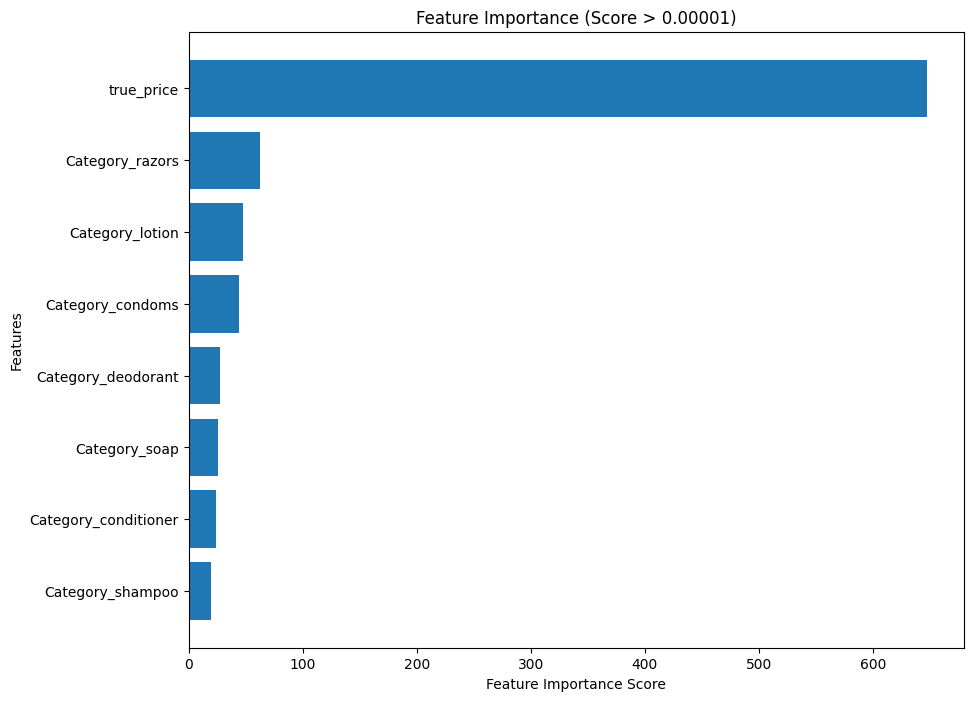

In [81]:
import matplotlib.pyplot as plt
important_features = feature_importances > 0.006
filtered_feature_names = np.array(feature_names)[important_features]
filtered_feature_importances = feature_importances[important_features]

# Sort features by importance
sorted_idx = np.argsort(filtered_feature_importances)
sorted_feature_names = filtered_feature_names[sorted_idx]
sorted_feature_importances = filtered_feature_importances[sorted_idx]

# Create a bar chart for filtered and sorted features
plt.figure(figsize=(10, 8))
plt.barh(sorted_feature_names, sorted_feature_importances)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance (Score > 0.00001)')
plt.show()